# Tarea: XOR y Círculo
## Redes Neuronales
---
14 de octubre de 2016

In [1]:
import tensorflow as tf
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pda
import matplotlib.pyplot as plt
%matplotlib inline

//anaconda/envs/tensorflow/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 1. XOR: Función sigmoidal

In [4]:
X=np.asarray([[0,0],[0,1],[1,0],[1,1]])
Y=np.asarray([[0],[1],[1],[0]])

In [5]:
# Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 1]) # la y real

W_layer1 = tf.Variable(tf.random_uniform([2, 2], -1, 1), 
                       name = "W_layer1")
b_layer1 = tf.Variable(tf.zeros([2]), 
                       name = "b_layer1")

W_layer2 = tf.Variable(tf.random_uniform([2, 1], -1, 1), 
                       name = "W_layer2")
b_layer2 = tf.Variable(tf.zeros([1]), 
                       name = "b_layer2")

# Modelo
hdn = tf.nn.sigmoid( tf.matmul(x,W_layer1) + b_layer1)
y = tf.nn.sigmoid( tf.matmul(hdn,W_layer2) + b_layer2) 

# Función de pérdida 

# cuadrática
# lossfn = tf.reduce_mean( tf.reduce_sum((y_ - y)**2) )

# entropía
lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
                        ((1 - y_) * tf.log(1.0 - y)) ) * -1) 

# Algoritmo de entrenamiento
train_step = tf.train.GradientDescentOptimizer(.01).minimize(lossfn)

In [6]:
# Incializa
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva
sess.run(init)
for i in range(100000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [7]:
correct_prediction = tf.equal(tf.round(y),y_) # aca estams definiendo otras operacioes
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

0.75


In [8]:
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))
print(sess.run(W_layer2, feed_dict={x: X, y_: Y}))
print(sess.run(y, feed_dict={x: X, y_: Y}))

[[-3.17317557  0.7057454 ]
 [-3.15626216  0.43053034]]
[[-3.35163665]
 [-0.66143197]]
[[ 0.20757991]
 [ 0.58564359]
 [ 0.57532722]
 [ 0.60124511]]


## 1b. XOR: Función Tangente Hiperbólica

In [17]:
x = tf.placeholder(tf.float32, [None, 2])
y_ = tf.placeholder(tf.float32, [None, 1]) # la y real

W_layer1 = tf.Variable(tf.random_uniform([2, 2], -1, 1), 
                       name = "W_layer1")
b_layer1 = tf.Variable(tf.zeros([2]), 
                       name = "b_layer1")

W_layer2 = tf.Variable(tf.random_uniform([2, 1], -1, 1), 
                       name = "W_layer2")
b_layer2 = tf.Variable(tf.zeros([1]), 
                       name = "b_layer2")

# • Modelo
hdn = tf.tanh( tf.matmul(x, W_layer1) + b_layer1)
y = tf.tanh( tf.matmul(hdn, W_layer2) + b_layer2) 

# • Función de pérdida 
# cuadrática
lossfn = tf.reduce_mean( tf.reduce_sum((y_ - y)**2) )
# entropía
# lossfn = tf.reduce_mean(( (y_ * tf.log(y)) +  
# ((1 - y_) * tf.log(1.0 - y)) ) * -1) 

# Algoritmo de entrenamiento
train_step = tf.train.GradientDescentOptimizer(.01).minimize(lossfn)

# Incializa
init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva
sess.run(init)
for i in range(3000):
  sess.run(train_step, feed_dict={x: X, y_: Y})

In [18]:
correct_prediction = tf.equal(tf.round(y), y_) 
accuracy = tf.reduce_mean(tf.cast( correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: X, y_: Y})) # las corremos

0.75


In [9]:
print(sess.run(W_layer1, feed_dict={x: X, y_: Y}))
print(sess.run(W_layer2, feed_dict={x: X, y_: Y}))
print(sess.run(y, feed_dict={x: X, y_: Y}))

[[-3.17317557  0.7057454 ]
 [-3.15626216  0.43053034]]
[[-3.35163665]
 [-0.66143197]]
[[ 0.20757991]
 [ 0.58564359]
 [ 0.57532722]
 [ 0.60124511]]


## 2. Clasificación círculo

In [21]:
dfcirc = pda.read_csv("../datos_clase/circulo.csv")
dfcirc.head()

,X1,X2,clase
0,-0.029538,1.493057,0
1,0.792684,-1.054827,0
2,1.245614,-0.002843,0
3,0.034398,1.169148,0
4,-1.424694,0.721020,0


In [22]:
x1 = dfcirc[dfcirc.columns[:2]]
y1 = dfcirc[dfcirc.columns[2]]
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, train_size=0.75)

In [23]:
print(x1_train.shape)
print(y1_train.shape)

(7500, 2)
(7500,)


In [24]:
xred = [[ x1_train['X1'][i]**2, x1_train['X2'][i]**2] for i in y1_train.index ]
yred = [[ y1_train[i]] for i in y1_train.index ]

In [25]:
input_size = 2
hdn_layer = 2
output_layer = 1

# Los placeholders son para los datos de entrada
x = tf.placeholder(tf.float32, [None, input_size])
y_ = tf.placeholder(tf.float32, [None, output_layer]) # la y real

W_layer1 = tf.Variable(tf.random_uniform([input_size, hdn_layer], -1, 1), 
                       name = "W_layer1")
b_layer1 = tf.Variable(tf.zeros([hdn_layer]), 
                       name = "b_layer1")

W_layer2 = tf.Variable(tf.random_uniform([hdn_layer, output_layer], -1, 1), 
                       name = "W_layer2")
b_layer2 = tf.Variable(tf.zeros([output_layer]), 
                       name = "b_layer2")

# • Modelo
hdn = tf.nn.sigmoid( tf.matmul(x, W_layer1) + b_layer1)
y = tf.nn.sigmoid( tf.matmul(hdn, W_layer2) + b_layer2) 

# Función de pérdida entropía
lossfn= tf.reduce_mean(( (y_ * tf.log(y)) +  
                        ((1 - y_) * tf.log(1.0 - y)) ) * -1) 


# Algoritmo de entrenamiento
train_step = tf.train.GradientDescentOptimizer(.01).minimize(lossfn)

init = tf.initialize_all_variables()
sess = tf.Session() # tipo de sesion, puede ser interactiva
sess.run(init)
for i in range(8000):
  sess.run(train_step, feed_dict={x: xred, y_: yred})

In [26]:
correct_prediction = tf.equal(tf.round(y), y_) 
accuracy = tf.reduce_mean(tf.cast( correct_prediction, tf.float32))
print(sess.run(accuracy, feed_dict={x: xred, y_: yred})) # las corremos

0.950533


Entrenamiento

In [27]:
ytrain_fit = sess.run(y, feed_dict={x: xred, y_: yred})
ytrain_fit

array([[ 0.08709159],
       [ 0.09096366],
       [ 0.28236216],
       ..., 
       [ 0.09555414],
       [ 0.75693971],
       [ 0.11382291]], dtype=float32)

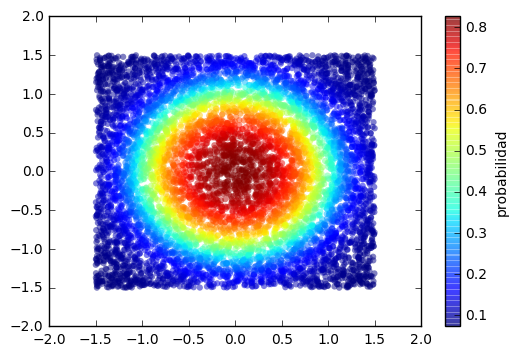

In [29]:
plt.scatter(x1_train['X1'], x1_train['X2'], c = ytrain_fit, 
            edgecolor = 'none',
            alpha = 0.5)
plt.colorbar(label = 'probabilidad')

In [28]:
confusion_matrix(yred, ytrain_fit> .5)

array([[4861,    0],
       [ 371, 2268]])

In [14]:
print np.sum(ytrain_fit > .5)
print np.sum(yred)

873
2662


Prueba

In [30]:
xtest = [[ x1_test['X1'][i]**2, x1_test['X2'][i]**2] for i in y1_test.index ]
ytest = [[ y1_test[i]] for i in y1_test.index ]
ytest_fit = sess.run(y, feed_dict={x: xtest})

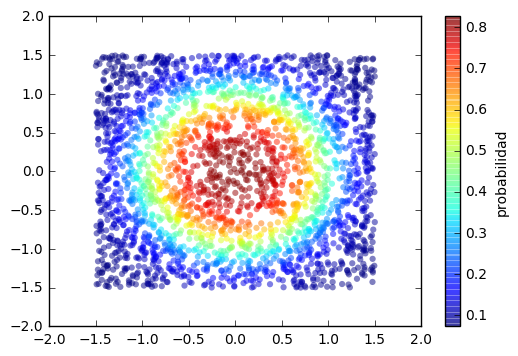

In [31]:
plt.scatter(x1_test['X1'], x1_test['X2'], c = ytest_fit, 
            edgecolor = 'none',
            alpha = 0.5)
plt.colorbar(label = 'probabilidad')

In [32]:
confusion_matrix(ytest, ytest_fit> .5)

array([[1644,    0],
       [ 124,  732]])